In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid", {'axes.grid' : False})

In [2]:
cRange = ['#475468', '#e7e6e6', '#4b73be', '#df8244', '#a5a5a5', '#f7c143',
          '#20406a', '#deeef8', '#2d6fc0', '#409cd4', '#5ccdd7', '#5ecb9e',
          '#a53218', '#c59933', '#f08a40', '#aa4f30', '#f7bf5d', '#d85733',
          '#728083', '#8babb4', '#7196ad', '#607397', '#8585c2', '#a687c1']
colors = ['#475468', '#e7e6e6', '#4b73be', 
          '#df8244', '#a5a5a5', '#f7c143'] 
cmapOffice = mpl.colors.ListedColormap([cRange[i] for i in range(0, 5)])
cmapBlue = mpl.colors.ListedColormap([cRange[i] for i in range(6, 11)])
cmapRed = mpl.colors.ListedColormap([cRange[i] for i in range(12, 17)])
cmapViolett = mpl.colors.ListedColormap([cRange[i] for i in range(18, 23)])

In [3]:
data = pd.read_csv("../00_data/data_with_calc_fields.csv", sep=";", decimal=",", index_col="datetime")
data.index = pd.to_datetime(data.index)

# How to characterize the distribution of prices?

In [4]:
data[["day_ahead_price", "intraday_price"]].describe()

,day_ahead_price,intraday_price
count,17542.000000,17542.000000
mean,31.588521,31.760971
std,15.483638,16.573758
min,-130.090000,-155.520000
25%,24.010000,23.912500
50%,31.070000,31.300000
75%,38.100000,38.747500
max,163.520000,200.430000


C:\Users\Laura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


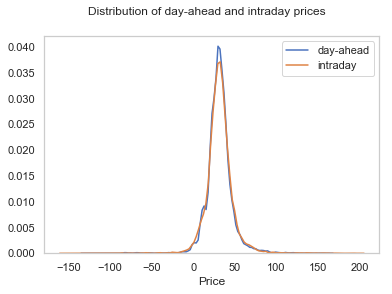

In [5]:
sns.kdeplot(data["day_ahead_price"], label="day-ahead", color=cRange[2])
sns.kdeplot(data["intraday_price"], label="intraday", color=cRange[3])
plt.xlabel("Price")
plt.suptitle("Distribution of day-ahead and intraday prices")
plt.show()


# What is the role of seasonality?

C:\Users\Laura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


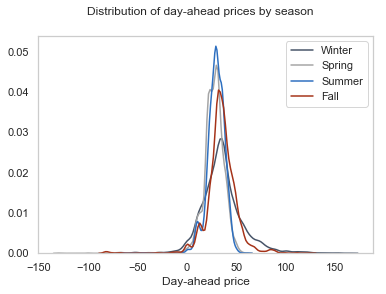

In [6]:
seasons = [ "Winter", "Spring", "Summer", "Fall"]
for i in range(4):
    sns.kdeplot(data.loc[(data.season==i),"day_ahead_price"], label=seasons[i], color=cRange[i*4])
plt.xlabel("Day-ahead price")
plt.suptitle("Distribution of day-ahead prices by season")
plt.show()

C:\Users\Laura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


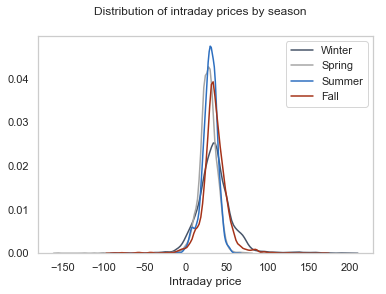

In [44]:
for i in range(4):
    sns.kdeplot(data.loc[(data.season==i),"intraday_price"], label=seasons[i], color=cRange[i*4])

plt.xlabel("Intraday price")
plt.suptitle("Distribution of intraday prices by season")
plt.show()

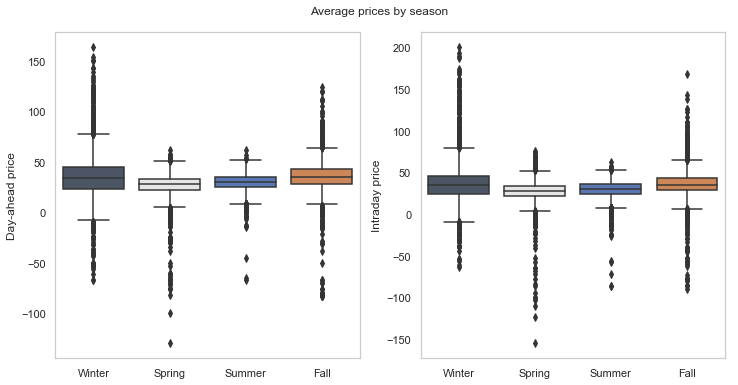

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x="season", y="day_ahead_price", data=data, ax=ax1, palette=colors)
ax1.set_xticklabels([season for season in seasons])
ax1.set_xlabel("")
ax1.set_ylabel("Day-ahead price")

sns.boxplot(x="season", y="intraday_price", data=data, ax=ax2, palette=colors)
ax2.set_xticklabels([season for season in seasons])
ax2.set_xlabel("")
ax2.set_ylabel("Intraday price")
plt.suptitle("Average prices by season", y=0.94)
plt.show()

# How did prices develop over time?

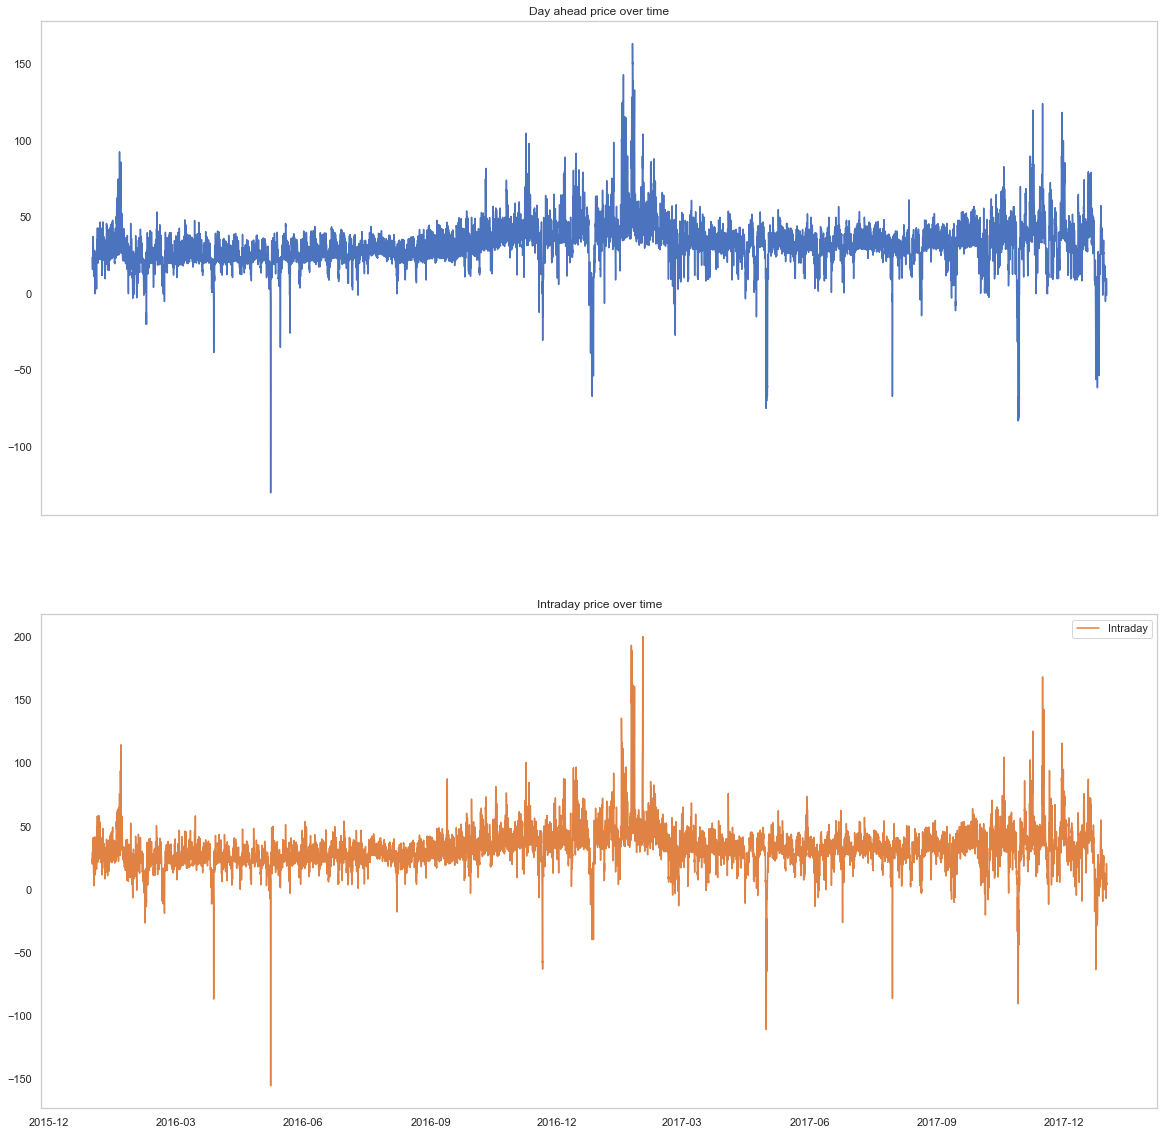

In [9]:
x = data.index
y1 = data["day_ahead_price"]
y2 = data["intraday_price"]

f, (ax, ax1) = plt.subplots(2, 1, figsize=(20, 20), sharex=True)
ax.plot(x, y1, label="Day ahead", c=cRange[2])
ax.set_title("Day ahead price over time")

ax1.plot(x, y2, label="Intraday", c=cRange[3])
ax1.set_title("Intraday price over time", )

plt.legend()
plt.show()

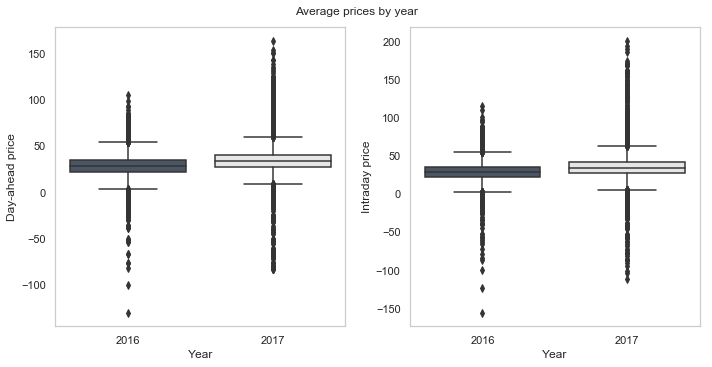

,day_ahead_price,intraday_price
year,,
2016,28.982276,29.246830
2017,34.201907,34.282001


In [42]:
data["year"] = data.index.year

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x="year", y="day_ahead_price", data=data, palette=cRange, ax=ax1)
sns.boxplot(x="year", y="intraday_price", data=data, palette=cRange, ax=ax2)
plt.suptitle("Average prices by year", y=1.01)
ax1.set_ylabel("Day-ahead price")
ax2.set_ylabel("Intraday price")
ax1.set_xlabel("Year")
ax2.set_xlabel("Year")
plt.tight_layout()
plt.show()

data[["day_ahead_price", "intraday_price"]].groupby(data["year"]).mean()


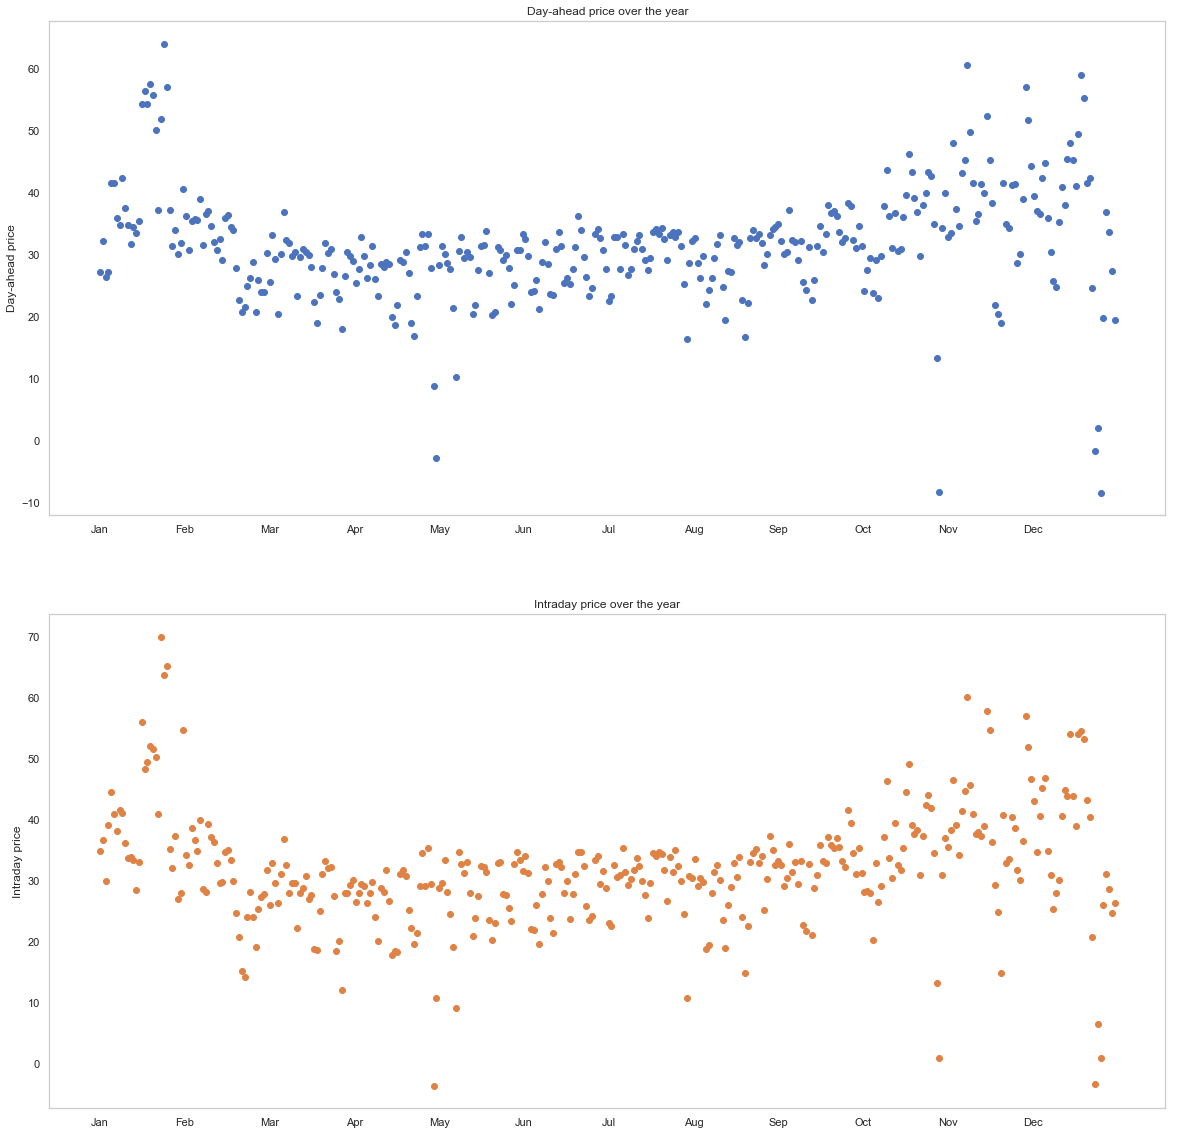

In [27]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
data["date_without_year"] = data.index.strftime('%m-%d')
data_grouped_date_w_year = data.groupby([data['date_without_year']]).mean()
x = data_grouped_date_w_year.index
y1 = data_grouped_date_w_year["day_ahead_price"]
y2 = data_grouped_date_w_year["intraday_price"]

f, (ax, ax1) = plt.subplots(2, 1, figsize=(20, 20))
ax.scatter(x, y1, label="Day-ahead", c=cRange[2])
ax.set_title("Day-ahead price over the year")
ax.set_ylabel("Day-ahead price")
ax.set_xticks(np.arange(360, step=30.5))
ax.set_xticklabels(2*[month for month in months])

ax1.scatter(x, y2, label="Intraday", c=cRange[3])
ax1.set_title("Intraday price over the year")
ax1.set_xticks(np.arange(360, step=30.5))
ax1.set_xticklabels(2*[month for month in months])
ax1.set_ylabel("Intraday price")

plt.show()
#data_grouped_date_w_year[["day_ahead_price", "intraday_price"]].describe()


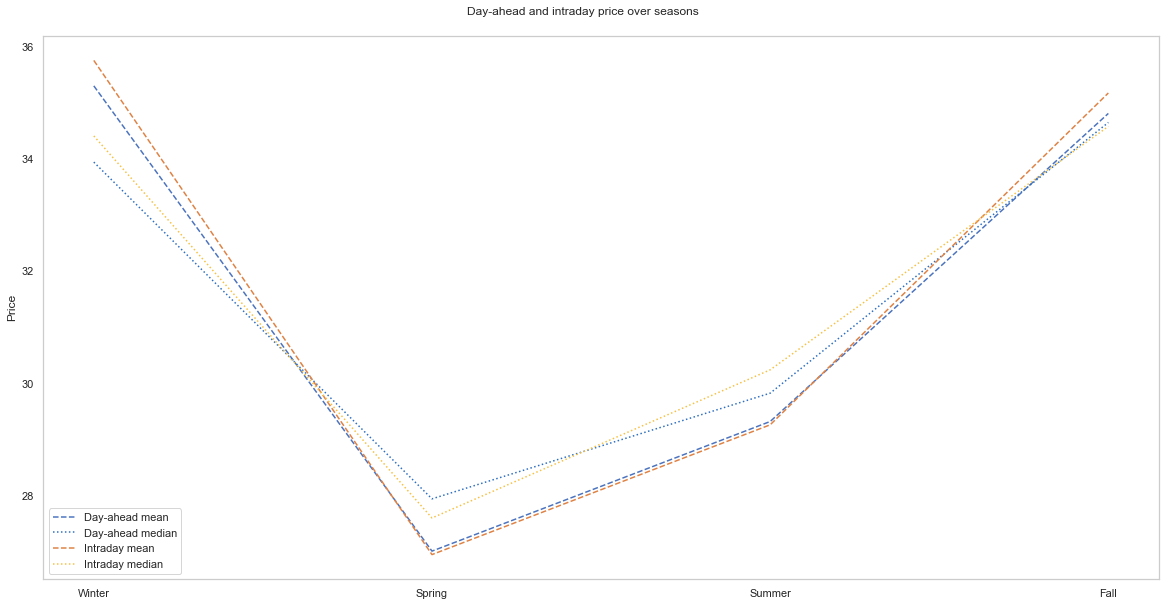

In [29]:
data_grouped_season = data[['season','day_ahead_price','intraday_price']].groupby([data['season']])
#data_grouped_season[['day_ahead_price', 'intraday_price']].describe()

data_grouped_season_mean = data_grouped_season.mean()
data_grouped_season_median = data_grouped_season.median()
data_grouped_season_min = data_grouped_season.min()
data_grouped_season_max = data_grouped_season.max()
x = data_grouped_season_mean.index
y1 = data_grouped_season_min["day_ahead_price"]
y2 = data_grouped_season_mean["day_ahead_price"]
y3 = data_grouped_season_median["day_ahead_price"]
y4 = data_grouped_season_max["day_ahead_price"]
y5 = data_grouped_season_min["intraday_price"]
y6 = data_grouped_season_mean["intraday_price"]
y7 = data_grouped_season_median["intraday_price"]
y8 = data_grouped_season_max["intraday_price"]
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
#ax.plot(x, y1, label="Day ahead", c="r", linestyle='--')
ax.plot(x, y2, label="Day-ahead mean", c=cRange[2], linestyle='--')
ax.plot(x, y3, label="Day-ahead median", c=cRange[8], linestyle=':')
#ax.plot(x, y4, label="Day ahead", c="r", linestyle='--')
#ax.plot(x, y5, label="Intraday", c="g", linestyle='--')
ax.plot(x, y6, label="Intraday mean", c=cRange[3], linestyle='--')
ax.plot(x, y7, label="Intraday median", c=cRange[5], linestyle=':')
#ax.plot(x, y8, label="Intraday", c="g", linestyle='--')
plt.suptitle("Day-ahead and intraday price over seasons", y=0.92)
plt.xticks(np.arange(4), seasons)
plt.ylabel("Price")
plt.legend()
plt.show()

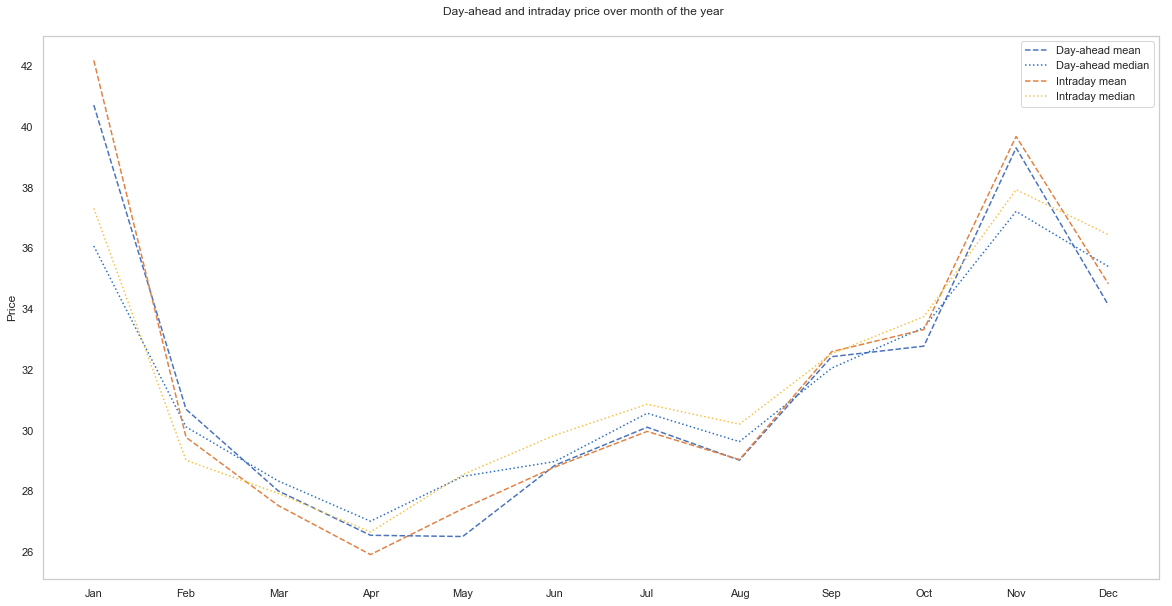

In [30]:
data_grouped_month = data[['month','day_ahead_price','intraday_price']].groupby([data['month']])
data_grouped_month[['day_ahead_price', 'intraday_price']].describe()

data_grouped_month_mean = data_grouped_month.mean()
data_grouped_month_median = data_grouped_month.median()
data_grouped_month_min = data_grouped_month.min()
data_grouped_month_max = data_grouped_month.max()
x = data_grouped_month_mean.index
y1 = data_grouped_month_min["day_ahead_price"]
y2 = data_grouped_month_mean["day_ahead_price"]
y3 = data_grouped_month_median["day_ahead_price"]
y4 = data_grouped_month_max["day_ahead_price"]
y5 = data_grouped_month_min["intraday_price"]
y6 = data_grouped_month_mean["intraday_price"]
y7 = data_grouped_month_median["intraday_price"]
y8 = data_grouped_month_max["intraday_price"]

f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
#ax.plot(x, y1, label="Day ahead", c="r", linestyle='--')
ax.plot(x, y2, label="Day-ahead mean", c=cRange[2], linestyle='--')
ax.plot(x, y3, label="Day-ahead median", c=cRange[8], linestyle=':')
#ax.plot(x, y4, label="Day ahead", c="r", linestyle='--')
#ax.plot(x, y5, label="Intraday", c="g", linestyle='--')
ax.plot(x, y6, label="Intraday mean", c=cRange[3], linestyle='--')
ax.plot(x, y7, label="Intraday median", c=cRange[5], linestyle=':')
ax.set_xticks(np.arange(1, 13, step=1) )
ax.set_xticklabels(2*[month for month in months])
#ax.plot(x, y8, label="Intraday", c="g", linestyle='--')
plt.ylabel("Price")
plt.suptitle("Day-ahead and intraday price over month of the year", y=0.92)
plt.legend()
plt.show()

# Do the general price levels differ in individual hours of the day?

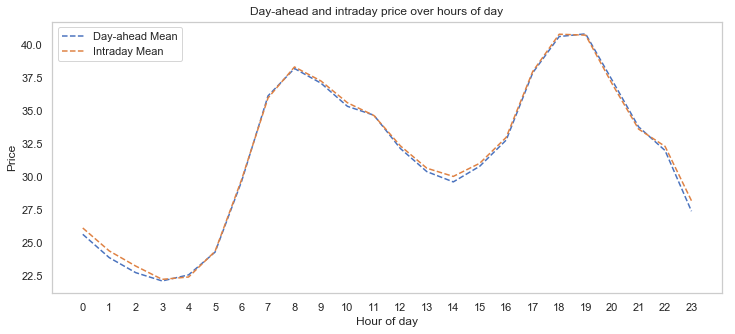

In [31]:
data_grouped_hour = data[['hour','day_ahead_price','intraday_price']].groupby([data['hour']])
#data_grouped_hour[['day_ahead_price', 'intraday_price']].mean().sort_values(by=['day_ahead_price'])

data_grouped_hour_mean = data_grouped_hour.mean()
data_grouped_hour_median = data_grouped_hour.median()
data_grouped_hour_min = data_grouped_hour.min()
data_grouped_hour_max = data_grouped_hour.max()

x = data_grouped_hour_mean.index
y1 = data_grouped_hour_min["day_ahead_price"]
y2 = data_grouped_hour_mean["day_ahead_price"]
y3 = data_grouped_hour_median["day_ahead_price"]
y4 = data_grouped_hour_max["day_ahead_price"]
y5 = data_grouped_hour_min["intraday_price"]
y6 = data_grouped_hour_mean["intraday_price"]
y7 = data_grouped_hour_median["intraday_price"]
y8 = data_grouped_hour_max["intraday_price"]

f, (ax) = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
#ax.plot(x, y1, label="Day ahead Min", c="r", linestyle='--')
ax.plot(x, y2, label="Day-ahead Mean", c=cRange[2], linestyle='--')
#ax.plot(x, y3, label="Day-ahead Median", c=cRange[8], linestyle=':')
#ax.plot(x, y4, label="Day ahead Max", c="r", linestyle='-.')
#ax.plot(x, y5, label="Intraday Min", c="g", linestyle='--')
ax.plot(x, y6, label="Intraday Mean", c=cRange[3], linestyle='--')
#ax.plot(x, y7, label="Intraday Median", c=cRange[5], linestyle=':')
#ax.plot(x, y8, label="Intraday Max", c="g", linestyle='-.')
ax.set_xticks(np.arange(24))
plt.ylabel("Price")
plt.xlabel("Hour of day")

plt.suptitle("Day-ahead and intraday price over hours of day", y=0.92)
plt.legend()
plt.show()

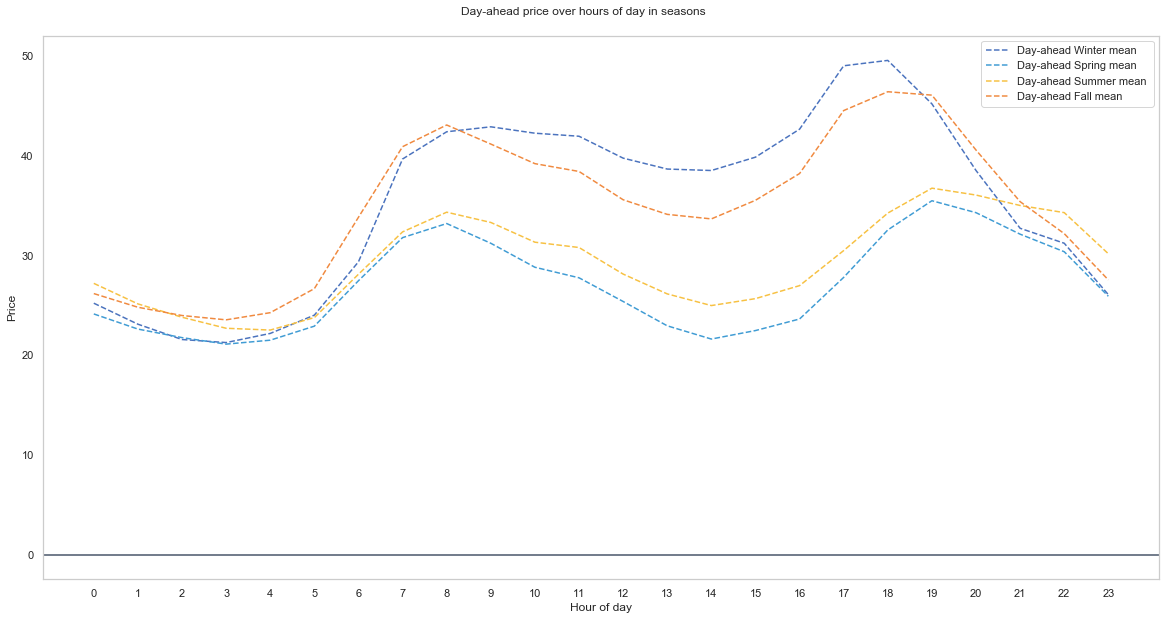

In [32]:
data_grouped_mean = data[['season', 'hour', 'day_ahead_price', 'intraday_price']].groupby([data['season'], data["hour"]]).mean()
#print(data_grouped_mean.head())
x = range(24)
y1 = data_grouped_mean.loc[(data_grouped_mean.season==0), "day_ahead_price"]
y2 = data_grouped_mean.loc[(data_grouped_mean.season==1), "day_ahead_price"]
y3 = data_grouped_mean.loc[(data_grouped_mean.season==2), "day_ahead_price"]
y4 = data_grouped_mean.loc[(data_grouped_mean.season==3), "day_ahead_price"]


fig1, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
ax.plot(x, y1, label="Day-ahead Winter mean", c=cRange[2], linestyle='--')
ax.plot(x, y2, label="Day-ahead Spring mean", c=cRange[9], linestyle='--')
ax.plot(x, y3, label="Day-ahead Summer mean ", c=cRange[5], linestyle='--')
ax.plot(x, y4, label="Day-ahead Fall mean", c=cRange[14], linestyle='--')

ax.axhline(y=0, color=cRange[0])
ax.set_xticks(np.arange(24))

plt.ylabel("Price")
plt.xlabel("Hour of day")
plt.suptitle("Day-ahead price over hours of day in seasons", y=0.92)

plt.legend()
plt.show()